<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
#db_connection = sqlite3.connect('m4_survey_data_1')

Connect to the database.


In [2]:
import sqlite3 as sql
conn = sql.connect("m4_survey_data_1.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd
import numpy as np
#import pandasql as ps

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
query = """
SELECT COUNT(*)
FROM master
"""
            

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(query,conn)
df

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [8]:
# your code goes here
import matplotlib.pyplot as plt

query = """
SELECT convertedcomp
FROM master
"""
df = pd.read_sql_query(query,conn)
df.head()

,ConvertedComp
0,61000.0
1,95179.0
2,90000.0
3,455352.0
4,65277.0


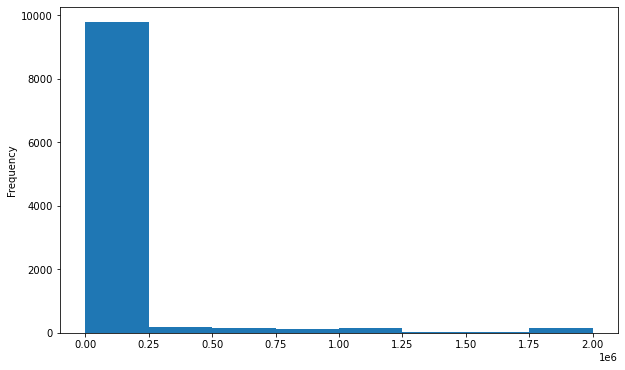

In [9]:
df['ConvertedComp'].plot(kind='hist', bins=8, figsize=(10,6))
plt.show()

### Box Plots


Plot a box plot of `Age.`


Text(0, 0.5, 'Years of Age')

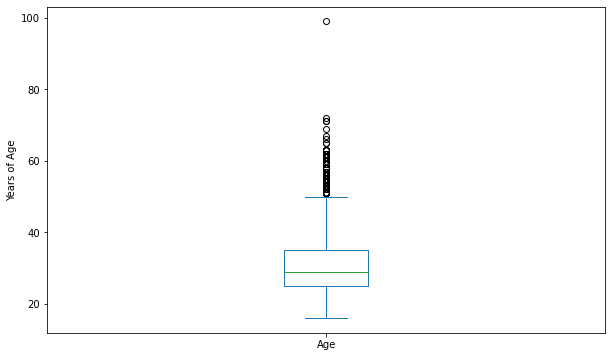

In [10]:
# your code goes here
query = """
SELECT age
FROM master
"""
df = pd.read_sql_query(query,conn)

df.plot(kind='box', figsize=(10,6))
plt.ylabel('Years of Age')

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


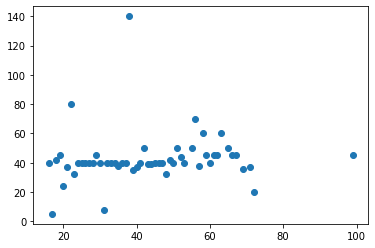

In [11]:
# your code goes here
query = """
SELECT age, workweekhrs
FROM master
group by age
"""
df = pd.read_sql_query(query,conn)

plt.scatter(df['Age'], df['WorkWeekHrs'])
plt.show()


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


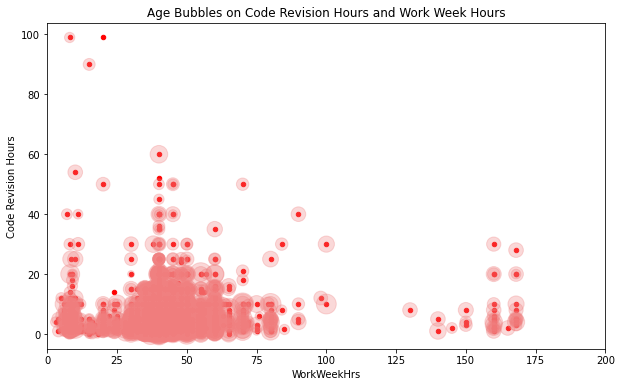

In [12]:
# your code goes here
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
df.head()

ax = df.plot(kind='scatter', x='WorkWeekHrs', y='CodeRevHrs', figsize=(10, 6), color='red')

plt.title('Age Bubbles on Code Revision Hours and Work Week Hours')
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')
plt.xlim(0,200)
#plt.ylim(0,70)

#sns.regplot(x="WorkWeekHrs", y="CodeRevHrs", data=df)



# normalize Age data
norm_age = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())

# Age
ax = df.plot(kind='scatter', 
                    x='WorkWeekHrs',
                    y='CodeRevHrs',
                    alpha=0.3,
                    color="lightcoral",
                    s=norm_age * 1000 + 10,
                    ax = ax
                   )

ax.set_ylabel('Code Revision Hours')
ax.set_title('Age Bubbles on Code Revision Hours and Work Week Hours')

plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


CREATE TABLE "DatabaseDesireNextYear" (
"Respondent" INTEGER,
  "DatabaseDesireNextYear" TEXT
)
   DatabaseDesireNextYear  Count    percent
11             PostgreSQL   4328  24.809401
7                 MongoDB   3649  20.917168
12                  Redis   3331  19.094296
8                   MySQL   3281  18.807681
3           Elasticsearch   2856  16.371453


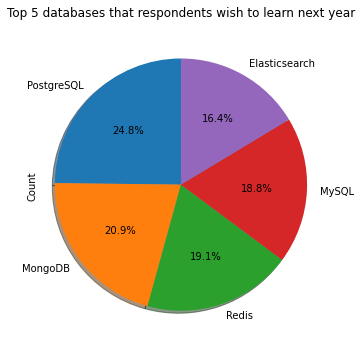

In [13]:
table_name = 'DatabaseDesireNextYear'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

QUERY = """
SELECT DatabaseDesireNextYear, count(DatabaseDesireNextYear) as Count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
"""
df = pd.read_sql_query(QUERY,conn)
df.sort_values('Count', ascending=False,inplace=True)

df = df.head(5)
total = df.sum(0)[1]

df['percent'] = 100 * df['Count']/total

df.set_index('DatabaseDesireNextYear')
print(df)


# autopct create %, start angle represent starting point
df['Count'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            labels=df['DatabaseDesireNextYear'])

plt.title('Top 5 databases that respondents wish to learn next year')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

CREATE TABLE "LanguageDesireNextYear" (
"Respondent" INTEGER,
  "LanguageDesireNextYear" TEXT
)
   LanguageDesireNextYear  Count    percent
13             JavaScript   6630  25.212001
11               HTML/CSS   5328  20.260866
18                 Python   5239  19.922425
22                    SQL   5012  19.059208
25             TypeScript   4088  15.545499


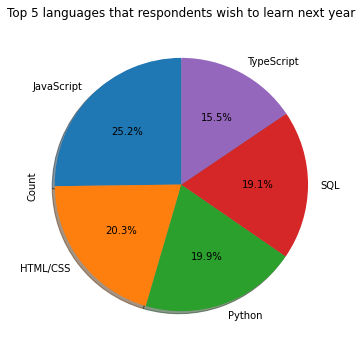

In [14]:
# your code goes here
table_name = 'LanguageDesireNextYear'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

QUERY = """
SELECT LanguageDesireNextYear, count(LanguageDesireNextYear) as Count
FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
"""
df = pd.read_sql_query(QUERY,conn)
df.sort_values('Count', ascending=False,inplace=True)

df = df.head(5)
total = df.sum(0)[1]

df['percent'] = 100 * df['Count']/total

df.set_index('LanguageDesireNextYear')
print(df)


# autopct create %, start angle represent starting point
df['Count'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            labels=df['LanguageDesireNextYear'])

plt.title('Top 5 languages that respondents wish to learn next year')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

In [15]:
table_name = 'LanguageWorkedWith'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

QUERY = """
SELECT LanguageWorkedWith, count(LanguageWorkedWith) as Count
FROM LanguageWorkedWith
GROUP BY LanguageWorkedWith
"""
df = pd.read_sql_query(QUERY,conn)
df.sort_values('Count', ascending=False,inplace=True)

print(df.head(5))

QUERY = """
SELECT Respondent, DatabaseWorkedWith, Count(*) AS Count
FROM DatabaseWorkedWith
GROUP BY Respondent
HAVING Count = 1 
   AND DatabaseWorkedWith = 'MySQL'
"""
df = pd.read_sql_query(QUERY,conn)
print(df.head())
print('The number of respondents who said they only work with MySQL is', df.shape[0])

CREATE TABLE "LanguageWorkedWith" (
"Respondent" INTEGER,
  "LanguageWorkedWith" TEXT
)
       LanguageWorkedWith  Count
13             JavaScript   8687
11               HTML/CSS   7830
22                    SQL   7106
1   Bash/Shell/PowerShell   4642
18                 Python   4542
   Respondent DatabaseWorkedWith  Count
0          25              MySQL      1
1         129              MySQL      1
2         147              MySQL      1
3         148              MySQL      1
4         194              MySQL      1
The number of respondents who said they only work with MySQL is 474


Text(0.5, 0, 'Number of Respondents')

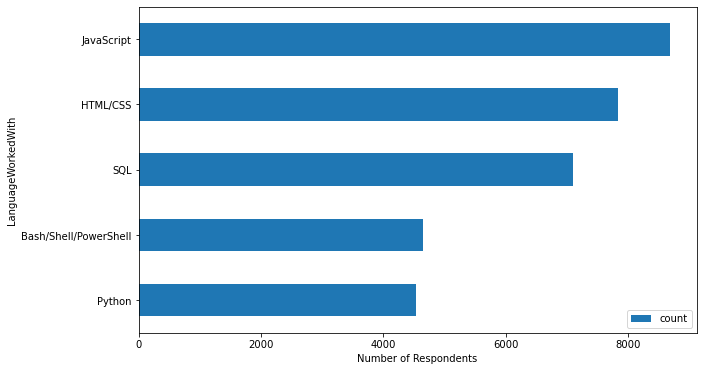

In [16]:
table_name = 'LanguageWorkedWith'  # the table you wish to describe

QUERY = """
SELECT LanguageWorkedWith, count(LanguageWorkedWith) as count
FROM LanguageWorkedWith
GROUP BY LanguageWorkedWith
ORDER BY count DESC
"""
df = pd.read_sql_query(QUERY,conn)
df = df.head()
df = df.set_index('LanguageWorkedWith')
df = df.sort_values('count')

df.plot(kind='barh', figsize=(10, 6))
plt.xlabel('Number of Respondents') # add to x-label to the plot


In [17]:
table_name = 'LanguageDesireNextYear'  # the table you wish to describe

QUERY = """
SELECT LanguageDesireNextYear, count(LanguageDesireNextYear) as count
FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
ORDER BY count DESC
"""
df = pd.read_sql_query(QUERY,conn)
df = df.head()
df = df.set_index('LanguageDesireNextYear')
df

,count
LanguageDesireNextYear,
JavaScript,6630
HTML/CSS,5328
Python,5239
SQL,5012
TypeScript,4088


Text(0.5, 0, 'Number of Respondents')

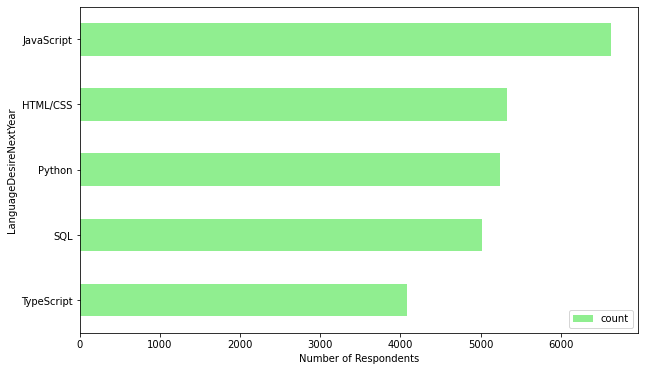

In [18]:

df = df.sort_values('count')
df.plot(kind='barh', figsize=(10, 6), color='lightgreen')

plt.xlabel('Number of Respondents') # add to x-label to the plot



Text(0.5, 0, 'Number of Respondents')

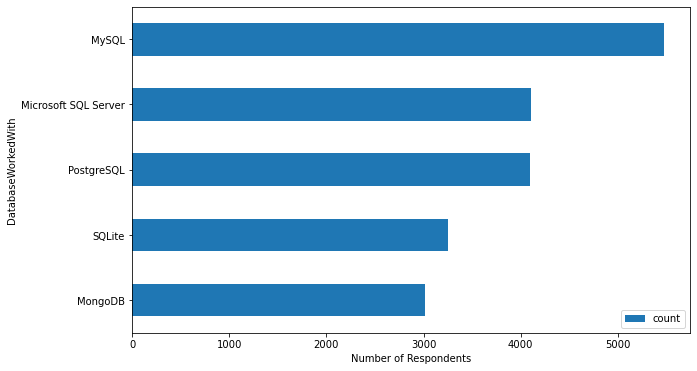

In [19]:
table_name = 'DatabaseWorkedWith'  # the table you wish to describe

QUERY = """
SELECT DatabaseWorkedWith, count(DatabaseWorkedWith) as count
FROM DatabaseWorkedWith
GROUP BY DatabaseWorkedWith
ORDER BY count DESC
"""
df = pd.read_sql_query(QUERY,conn)
df = df.head()
df = df.set_index('DatabaseWorkedWith')
df = df.sort_values('count')

df.plot(kind='barh', figsize=(10, 6))
plt.xlabel('Number of Respondents') # add to x-label to the plot

Text(0.5, 0, 'Number of Respondents')

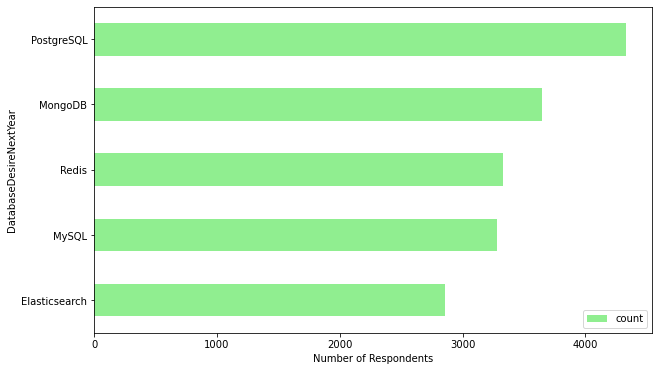

In [20]:
table_name = 'DatabaseDesireNextYear'  # the table you wish to describe

QUERY = """
SELECT DatabaseDesireNextYear, count(DatabaseDesireNextYear) as count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY count DESC
"""
df = pd.read_sql_query(QUERY,conn)
df = df.set_index('DatabaseDesireNextYear')
df = df.head()
df = df.sort_values('count')
df.plot(kind='barh', figsize=(10, 6), color='lightgreen')
plt.xlabel('Number of Respondents') # add to x-label to the plot


Text(0.5, 0, 'Number of Respondents')

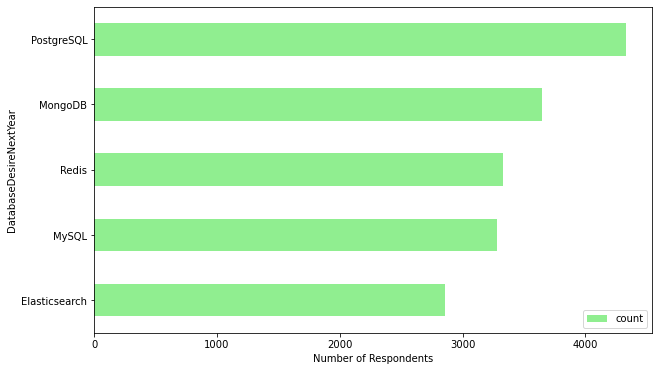

In [21]:
df.plot(kind='barh', figsize=(10, 6), color='lightgreen')
plt.xlabel('Number of Respondents') # add to x-label to the plot


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


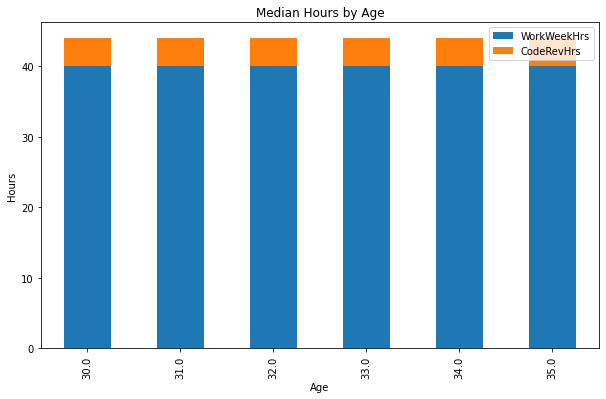

In [22]:
# your code goes here
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, age 
FROM master
WHERE age > 29 AND age < 36
"""
df = pd.read_sql_query(QUERY,conn)
df = df.groupby('Age', axis=0).median()

df.plot(kind='bar', figsize=(10, 6), stacked=True,)

plt.ylabel('Hours')
plt.title('Median Hours by Age')
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


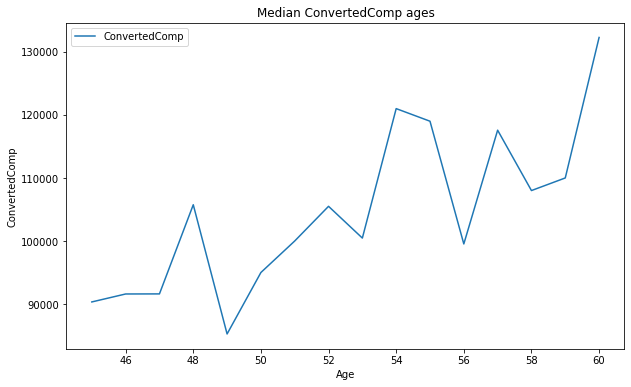

In [23]:
# your code goes here
QUERY = """
SELECT ConvertedComp, age 
FROM master
WHERE age > 44 AND age < 61
"""
df = pd.read_sql_query(QUERY,conn)
df = df.groupby('Age', axis=0).median()

df.plot(kind='line', figsize=(10, 6))
plt.ylabel('ConvertedComp')
plt.title('Median ConvertedComp ages')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


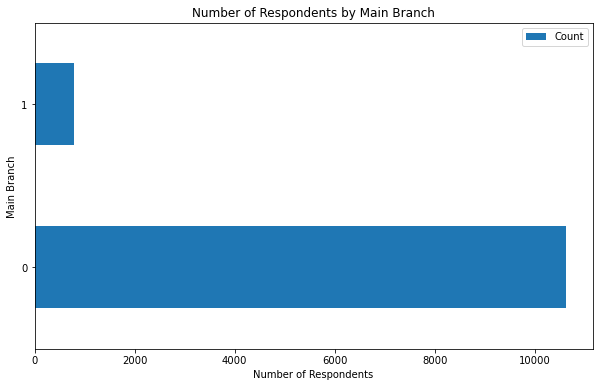

In [24]:
QUERY = """
SELECT MainBranch, count(MainBranch) as Count
FROM master
GROUP BY MainBranch
"""
df_main = pd.read_sql_query(QUERY,conn) 
df_main.head()

# group respondents by age and apply median() function 
#df_main = df_main.groupby('Age', axis=0).median()


# step 2: plot data
df_main.plot(kind='barh', figsize=(10, 6))

plt.xlabel('Number of Respondents') # add to x-label to the plot
plt.ylabel('Main Branch') # add y-label to the plot
plt.title('Number of Respondents by Main Branch') # add title to the plot
plt.show()

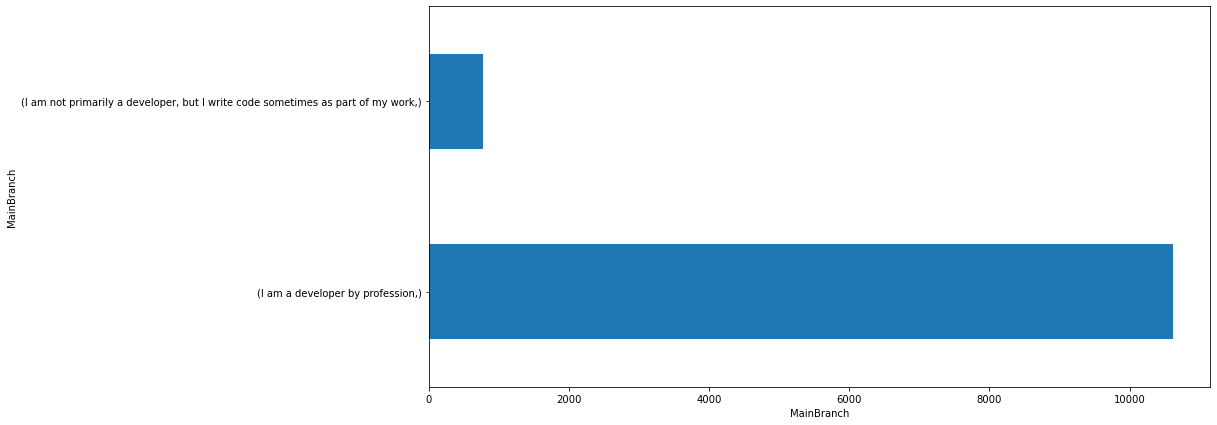

In [25]:
# your code goes here
QUERY = """
SELECT MainBranch
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
df = df.value_counts()

df.plot(kind='barh', figsize=(14, 7))
plt.xlabel('MainBranch')

plt.show()

In [26]:
table_name = 'DevType'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

#step 1: get the data needed
QUERY = """
SELECT DevType, count(DevType) as Count
FROM DevType
GROUP BY DevType
"""
df_type = pd.read_sql_query(QUERY,conn) 
df_type = df_type.sort_values('Count', ascending=False)
df_type.head()

CREATE TABLE "DevType" (
"Respondent" INTEGER,
  "DevType" TEXT
)


,DevType,Count
11,"Developer, full-stack",6928
7,"Developer, back-end",6290
10,"Developer, front-end",3920
8,"Developer, desktop or enterprise applications",2575
13,"Developer, mobile",1959


Close the database connection.


In [27]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
